In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 1- Temple

Score de correspondance : 1.00


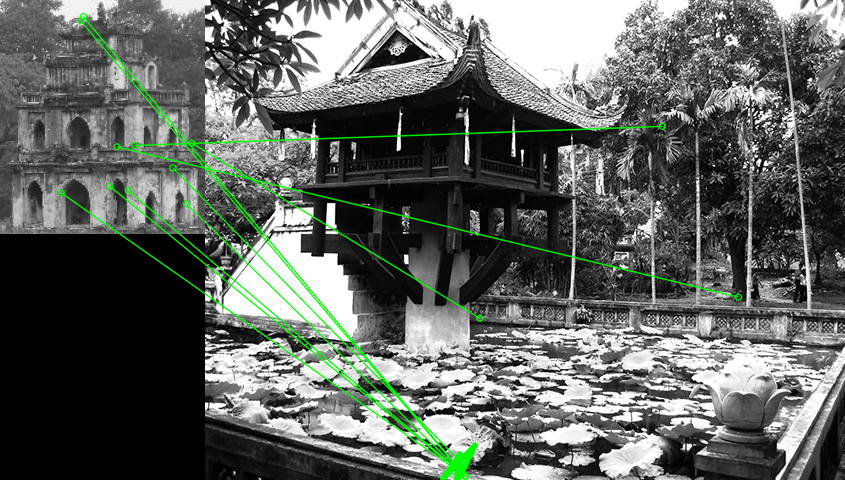

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/thaprua.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/chuamotcot.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 5  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Score de correspondance : 0.37


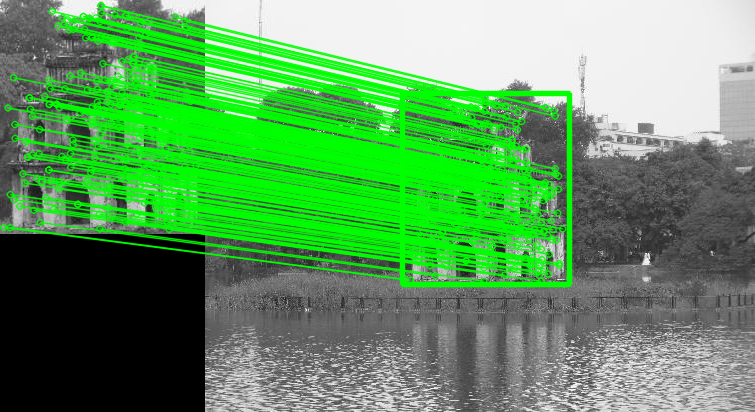

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/thaprua.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/thaprua2.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 0.75  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

# 2- La télécommande


In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090548_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 0.75  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090548_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003418_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 0.7  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090548_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 0.75  # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 100  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

# 3- Ecouteur

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090538_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003418_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 1.5 # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 200.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090553_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003418_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 1.5 # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

# 4- Elephant

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090528_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 10 # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))


# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 100.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 2], [w - 1, h - 2], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Chemins vers vos images spécifiques sur Google Drive
chemin_image_objet = '/content/drive/MyDrive/Vision_par_ordinateur/Objets/20221206_090604_small.jpg'
chemin_image_recherche = '/content/drive/MyDrive/Vision_par_ordinateur/Image_Recherche/20221206_003721_small.jpg'

# Charger les images
image_objet = cv2.imread(chemin_image_objet, cv2.IMREAD_GRAYSCALE)
image_recherche = cv2.imread(chemin_image_recherche, cv2.IMREAD_GRAYSCALE)

# Vérifier si les images ont été chargées correctement
if image_objet is None or image_recherche is None:
  raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

# Convertir l'image de recherche en couleur pour l'affichage final
image_recherche_color = cv2.cvtColor(image_recherche, cv2.COLOR_GRAY2BGR)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Détecter les points d'intérêt et calculer les descripteurs SIFT
kp_objet, des_objet = sift.detectAndCompute(image_objet, None)
kp_recherche, des_recherche = sift.detectAndCompute(image_recherche, None)

# Matcher les descripteurs avec l'algorithme BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_objet, des_recherche, k=2)

# Appliquer le ratio test pour filtrer les correspondances
bonnes_correspondances = []
ratio_threshold = 10 # Seuil du ratio pour le test
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        bonnes_correspondances.append(m)

# Calculer le score de correspondance
score_correspondance = len(bonnes_correspondances) / len(des_objet)

# Afficher le score de correspondance
print("Score de correspondance : {:.2f}".format(score_correspondance))

# Trouver l'homographie si on a assez de correspondances
MIN_MATCH_COUNT = 10  # Nombre minimal de correspondances pour une homographie robuste
if len(bonnes_correspondances) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp_objet[m.queryIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_recherche[m.trainIdx].pt for m in bonnes_correspondances]).reshape(-1, 1, 2)

    # Calculer l'homographie avec RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 30.0)
    matchesMask = mask.ravel().tolist()

    # Obtenir les coins de l'image objet pour dessiner le polygone
    h, w = image_objet.shape
    pts = np.float32([[0, 0], [0, h - 2], [w - 1, h - 2], [w - 1, 0]]).reshape(-1, 1, 2)

    # Projeter les coins dans l'image de recherche
    dst = cv2.perspectiveTransform(pts, M)

    # Dessiner les coins sur l'image de recherche colorée
    image_recherche_color = cv2.polylines(image_recherche_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)
else:
    print("Pas assez de correspondances trouvées - {}/{}".format(len(bonnes_correspondances), MIN_MATCH_COUNT))
    matchesMask = None

# Dessiner les correspondances avec un masque pour ne montrer que les bonnes correspondances
draw_params = dict(matchColor=(0, 255, 0),  # Couleur des correspondances
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Masque pour filtrer les correspondances
                   flags=2)

img_correspondance = cv2.drawMatches(image_objet, kp_objet, image_recherche_color, kp_recherche, bonnes_correspondances, None, **draw_params)

# Afficher l'image avec les correspondances et l'objet localisé
cv2_imshow(img_correspondance)

Output hidden; open in https://colab.research.google.com to view.